In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0,'../python/')

from startup import *

In [3]:
problem_id='MHD_4pc_new'

In [4]:
zpfname='../data/{}.merged.nc'.format(problem_id)
data=xr.open_dataset(zpfname)

In [5]:
import astropy.constants as c
import astropy.units as u
G = c.G.cgs.value
Msun = c.M_sun.cgs.value
pc = c.pc.cgs.value
pi = np.pi
m_unit = 1.4271*c.m_p.cgs.value*pc**3
l_unit = pc
v_unit = 1.e5
t_unit = l_unit/v_unit
G_code = (G/l_unit**3)*m_unit*t_unit**2
rho_unit = m_unit/l_unit**3

p_unit = rho_unit*v_unit**2#m_unit * (1./l_unit) / t_unit/ t_unit
deltaz = data.zaxis.data[1]-data.zaxis.data[0]
kb = c.k_B.cgs.value
print(rho_unit, p_unit, pc, deltaz, kb)

2.3869987106358e-24 2.3869987106358e-14 3.085677581467192e+18 4.0 1.38064852e-16


In [6]:
v1=np.sqrt(2.0*data['Ek1']/data['d'])
v2=np.sqrt(2.0*data['Ek2']/data['d'])
v3=np.sqrt(2.0*data['Ek3']/data['d'])

In [10]:
f, axes = plt.subplots(1, 1, figsize=(6,4))

axes = [axes]
for ax,ph,ph_label in zip(axes,['phase3'],['warm']):
# for ax,ph,ph_label in zip(axes,['phase3','phase4','phase5'],['warm','int.','hot']):
    plt.sca(ax)
    plt.annotate(ph_label,(0.05,0.9),xycoords='axes fraction')
#     for v,vlab in zip([v1,v2,v3],[r'$\sigma_x$',r'$\sigma_y$',r'$\sigma_z$']):
    for v,vlab in zip([v1,v2],[r'$\sigma_x$',r'$\sigma_y$']):
        plt.plot(v.zaxis/1.e3,v.sel(taxis=slice(200,550)).mean(dim='taxis').sel(phase=ph),label=vlab)
plt.legend(loc='upper right')
axes[0].set_ylim(0,30)
# axes[1].set_ylim(0,80)
# axes[2].set_ylim(0,200)
axes[0].set_ylabel('velocity [km/s]')
plt.setp(axes,'xlabel','z [kpc]')
plt.tight_layout()
plt.savefig('../figures/veld.pdf',bbox_inches='tight',dpi=200)

/Users/ckim/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/ckim/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


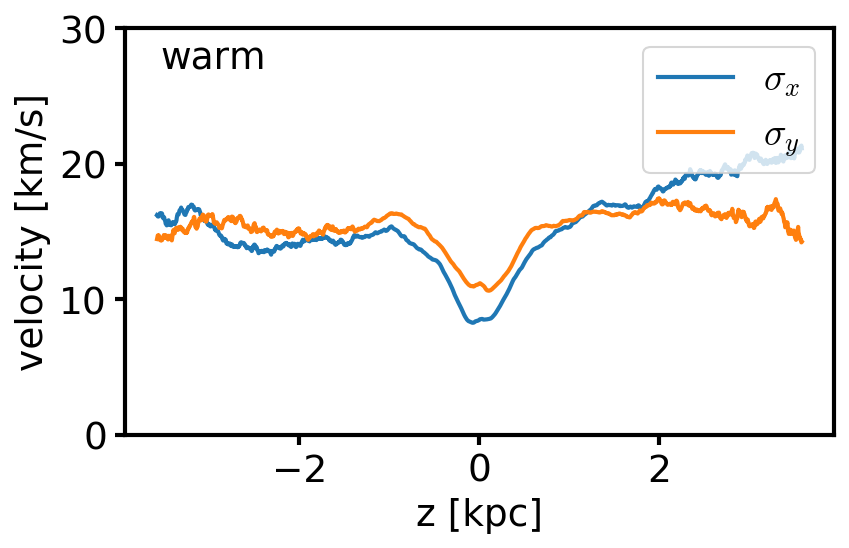

In [11]:
f